# COVID-19 Auswertung - DIVI

In [1]:
Programm_Name = "DIVI"

### Speicherorte und Dateinamen Plots

In [2]:
Laufwerk = "D:\\"
name_input = 'data-ovyiI.csv'
name_output_df = 'Dataframes\\df_divi2.csv'

pfad_output = "Github\\Auswertung_Covid_19\\output\\"
pfad_onedrive = "OneDrive\\Auswertung_Covid_19\\"
pfad_input = "Github\\Auswertung_Covid_19\\input\\"
name_performance = 'Dataframes\\df_performance.csv'

name_1_1 = "plot_1-1_cases_absolute numbers.png" # cases absoulte zahlen EU
name_1_2 = "plot_1-2_cases.png" # cases pro 100.000 Einwohner EU 
name_2 = "plot_2_intensiv.png" # intensiv Deutschland
name_2_2 = "plot_2_2_intensiv_gesamt.png" # intensiv Deutschland covid und nicht covid
name_2_3 = "plot_2_3_intensiv_covid-19.png" # intensiv Deutschland covid
name_3_1 = "plot_3-1_deaths_absolute numbers.png" # deaths absolute zahlen EU
name_3_2 = "plot_3-2_deaths.png" # deaths pro 100.000 Einwohner EU
name_4_1 = "plot_4-1_cases_ger.png" # cases Deutschland
name_4_2 = "plot_4-2_deaths_ger.png" # deaths Deutschland
name_5 = "performance_dist_plot.png" # Performance Plot
name_6 = "plot_6_Positivenquote_ger.png" # Positivenquote
name_6_2 = "plot_6-2_Anzahl_Testungen_ger.png" # Anzahl Testungen
name_7 = "plot_7_Impfquote_ger.png" # Impfquote Deutschland Bundesländer
name_7_2 = "plot_7-2_Impfungen_Timeseries_ger.png" # Impfungen Timeseries Deutschland
name_7_3 = "plot_7-3_Impfungen_Timeseries_ger.png" # Impfungen Timeseries Deutschland

## import libraries

In [3]:
import pandas as pd #Daten
from matplotlib import pyplot as plt # plots
from matplotlib.ticker import FuncFormatter   # Numberformat plot ticks
import matplotlib.dates as mdates

# performance
from datetime import datetime, timedelta
from datetime import date # todays date

import os
now = datetime.now()

In [4]:
# Datum einstellen 
minticks = 14
maxticks = 14

# Preprocessing Dataframes

### Linien und Schriftgrößen

In [5]:
# Linien Stärke
lws = 3
lwb = 7
# Bezugsschriftgröße
size = 25

# output größe der bilder
h = 16*1
v = 9
dpi = 200

In [6]:
today = date.today().strftime("%d.%m.%Y")

## Datenimport

# Variablen für die Plots definieren

## Länder Farben

In [7]:
c_fr = '#f80d0d'    # rot
c_pl = '#25e5e5'    # cyan
c_isr = '#25e5e5'
c_ger = '#0721ff'   # dunkelblau
c_cz = '#bb8fce'    # lila
c_usa = '#bb8fce'
c_at = '#18c213'    # grün
c_rus = '#18c213'
c_se = '#18c213'
c_ch = '#000000'    # schwarz
c_ita = '#000000'
c_gb = '#faac2b'    # orange


In [8]:
# Lokal - CSV einlesen
df_divi2 = pd.read_csv(Laufwerk + pfad_input + name_input)
df_divi2['date'] = pd.to_datetime(df_divi2.date, utc=True)
#df_divi2 = df.loc[df.date >= ts, :]

## preprocessing

### data (DIVI)

In [9]:
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

In [10]:
a = str(date.today().strftime("%Y-%m-%d"))
print(a)
tage = days_between(a, "2020-02-01")
print(tage)

2021-06-05
490


In [11]:
ts_x = str(datetime.today() - timedelta(tage))
ts_x = str(datetime.today() - timedelta(tage))

In [12]:
#Timestamp definieren  YYYY-MM-DD
#ts = pd.to_datetime('2020-10-14', utc=True)

print(datetime.today())

# ts_x = str(datetime. today() - timedelta(140))
ts = pd.to_datetime(ts_x, utc=True)
print(ts)

2021-06-05 20:30:22.623739
2020-02-01 20:30:22.607782+00:00


### df_divi2 (DIVI)

In [13]:
# Zeit eingrenzen

df_divi2 = df_divi2.loc[df_divi2.date >= ts, :]
#df_divi2.head(1)

### 2-2) Intensivstationen DIVI2

In [14]:
# df_divi2

## Änderungsrate

In [15]:

# df_divi2["change_1"] = 100 * df_divi2["COVID-19-Fälle"].pct_change(periods=1)   # Berechnung OK - 20.02.2021 PW

# # df_divi2["change_1_MW"] = df_divi2["change_1"].rolling(window=3, min_periods=1, center=True).mean()  # OK 20.02.2021 PW

# df_divi2["MSTD"] = df_divi2["change_1"].rolling(window=7,min_periods=1).std()

# df_divi2["change_1_MW_std+"] = df_divi2["change_1"] + df_divi2["MSTD"]
# df_divi2["change_1_MW_std-"] = df_divi2["change_1"] - df_divi2["MSTD"]

# # # ger_change["change_1_MW_std+"] = ger_change["change_1_MW"] + 
# # # ger_change["change_1_MW_std-"] = 

# # df_divi2["week_isocalendar"] = df_divi2["Date_reported"].dt.isocalendar().week 

# df_divi2["R1"] = 0
# df_divi2
# #df

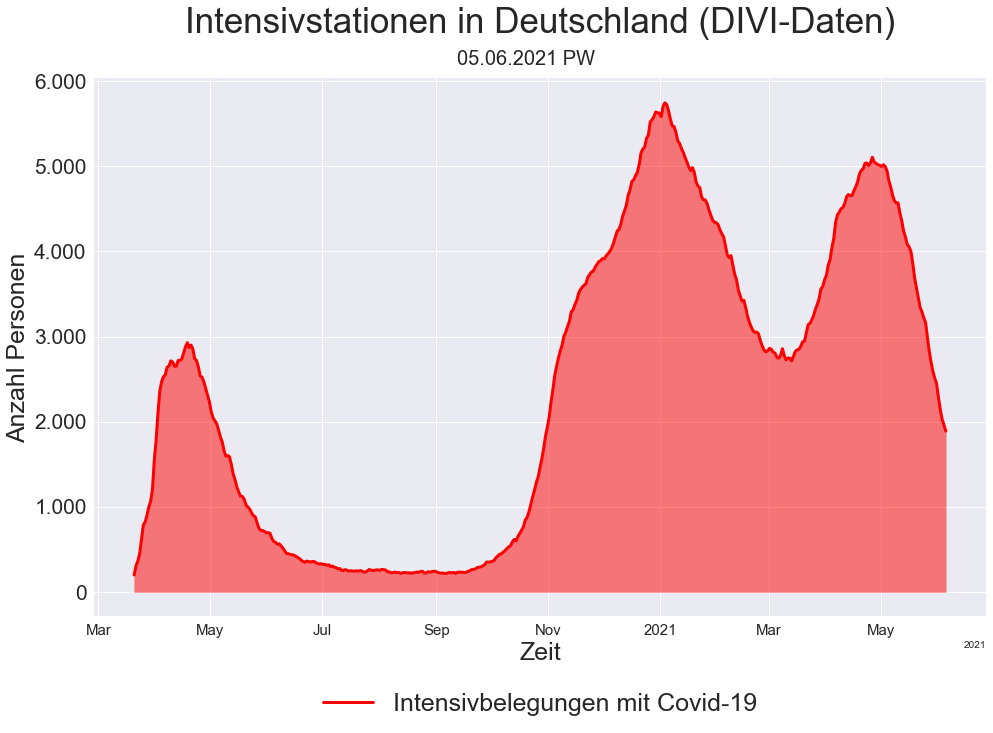

In [16]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
#plt.figure(figsize=(19,9))

def y_axis_thousands(x, pos):
   # 'The two args are the value and tick position'
    return '{:0,d}'.format(int(x)).replace(",",".")
formatter = FuncFormatter(y_axis_thousands)
plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(h, v*1.1))

ax.yaxis.set_major_formatter(formatter)

plt.style.use('seaborn')
plt.grid(True)

#plt.plot(df_divi2.date,df_divi2['Belegte Betten'], color = 'blue', linewidth = lws, label = "nicht-Covid-19")
ax1 = plt.plot(df_divi2.date,df_divi2['COVID-19-Fälle'], color = 'red', linewidth = lws, label = "Intensivbelegungen mit Covid-19")


plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, -0.1),
           fancybox=True, 
           shadow=True, 
           ncol=2, 
           fontsize=size)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10, rotation = 0)
plt.yticks(fontsize=size -4)

# plt.xticks([])
plt.ylabel('Anzahl Personen', fontsize=size)
plt.xlabel('Zeit', fontsize=size)
#plt.title('DIVI-Intensivregister (www.intensivregister.de)  \n Stand: ' + today, fontsize=size)

plt.title('Intensivstationen in Deutschland (DIVI-Daten)\n', fontsize=size+10)
plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)

# fill area between 
plt.fill_between(df_divi2.date, df_divi2['COVID-19-Fälle'], color='red',alpha=0.5)
#plt.fill_between(df_divi2.date, df_divi2['COVID-19-Fälle'], df_divi2['Belegte Betten'], color='blue',alpha=0.5)

locator = mdates.AutoDateLocator(minticks=minticks, maxticks=maxticks)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig(Laufwerk + pfad_output + name_2_3, dpi = dpi, bbox_inches='tight')
plt.savefig(Laufwerk + pfad_onedrive + name_2_3, dpi = dpi, bbox_inches='tight')

plt.show()

## dataframes speichern

In [17]:
df_divi2.to_csv(Laufwerk + pfad_output + name_output_df, index=False)

## Performance messen

In [18]:
pc = os.environ['COMPUTERNAME']
now2 = datetime.now()

# Laufzeit
x = now2 - now
x = round(x.total_seconds(),2)

# Performance CSV einlesen
d = pd.read_csv(Laufwerk + pfad_output + name_performance)

# Neues Dateframe für die Performance definieren
now = datetime.now()

d2 = {'Date': [now],
      'PC': [pc],
      'Laufzeit_in_s': [x],
      'Version': [Programm_Name]}

# Datum Spalte formatieren
df2 = pd.DataFrame(d2)
df2['Date'] = df2['Date'].dt.strftime('%Y-%m-%d %r')

# Performance mit dem CSV verbinden
d = d.append(df2, ignore_index=True)

# Datenexport Performance
d.to_csv(Laufwerk + pfad_output + name_performance, index=False)

print(f'performance {pc} = {x} seconds')

performance DOUG = 1.25 seconds
